In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\artyo\OneDrive\Рабочий стол\Datasets\Datasets\Nornikel\task.csv')

In [3]:
# Соотношение записей к количеству атрибутов ~ 2 к 1. 
# Будет необходимо поработать над уменьшением размерности 

df.shape

(1000, 630)

In [4]:
# Пример записей 

df.sample(7)

,Unnamed: 0,respid,status,q1,q2,hage,q3,q4x1,q4x2,q4x3,...,q20_2n,q20_3n,q20_4n,q20_5n,q20_6n,q20_7n,q20_count,q20_final,QCL_1,QCL_2
504,505,5718,complete ...,Muško,32,30-34,Da,Dnevno,Dnevno,Jednom svaka 1-3 mjeseca,...,1,1,0,0,1,0,3,2 to 4 activities,NaN,3
506,507,5644,complete ...,Muško,44,40-44,Da,Jednom svakih par dana,Jednom svakih par dana,Jednom svakih par dana,...,1,0,1,0,1,1,4,2 to 4 activities,NaN,2
961,962,5389,complete ...,Žensko,25,25-29,Da,Jednom svaka 1-3 mjeseca,Jednom svaka 2-4 tjedna,NaN,...,0,0,0,1,0,0,1,None,NaN,1
919,920,234,complete ...,Muško,38,35-39,Da,Jednom svaka 2-4 tjedna,Dnevno,NaN,...,0,1,0,0,1,0,2,2 to 4 activities,NaN,1
611,612,3933,complete ...,Žensko,47,45-50,Da,Jednom svakih par dana,Jednom svakih par dana,Jednom svaka 2-4 tjedna,...,0,1,0,0,0,1,3,2 to 4 activities,NaN,1
837,838,4115,complete ...,Žensko,37,35-39,Da,Jednom svakih par dana,Dnevno,NaN,...,1,1,0,0,1,1,4,2 to 4 activities,NaN,1
569,570,3996,complete ...,Žensko,32,30-34,Da,Jednom svaka 2-4 tjedna,Jednom svakih par dana,NaN,...,0,0,0,0,0,0,0,None,NaN,3


In [5]:
# Пример наполнения атрибута 

df['hq4_2'].value_counts()

Mali ducan s kucnim potrepštinama (Koliko cesto kupujete hranu i kucne potrepštine u jednom od ovih ducana?)    948
Name: hq4_2, dtype: int64

### Первичные выводы

- Соотношение количества записей к количеству атрибутов ~ 2 к 1. Необходимо выявить наиболее значимые из фичей


- У датасета нет описания, как и у его фичей. Однако, в значениях атрибутов может встретиться и сам вопрос. Например: _Mali ducan s kucnim potrepštinama (Koliko cesto kupujete hranu i kucne potrepštine u jednom od ovih ducana?)_ - сам вопрос в переводе с хорватского звучит как _Как часто вы покупаете продукты и товары для дома в одном из этих магазинов?_. Из таких примеров можно попробовать понять смысл данных.


- В датасете имеются фичи со схожими названиями, например: ['q6_1', 'q6_2', 'q6_3', 'q6_4'] Возможно, при детальном рассмотрении их в группе откроется, что часть из них является избыточными.


In [6]:
from itertools import groupby

In [7]:
# Группировка по наличию '_' в наименовании атрибута 
groups = [list(i) for j, i in groupby( df.columns,
                                       lambda a: a.partition('_')[0])] 
print('Количество выявленных групп: {}'.format(len(groups)))

Количество выявленных групп: 83


In [8]:
# Сами группы
# Количество групп будет меньше 83 т.к. не у всех атрибутов роль разделителя играет '_'
# Также часть атрибутов может дублировать друг друга

groups

[['Unnamed: 0'],
 ['respid'],
 ['status'],
 ['q1'],
 ['q2'],
 ['hage'],
 ['q3'],
 ['q4x1'],
 ['q4x2'],
 ['q4x3'],
 ['q4x4'],
 ['hq4_1', 'hq4_2', 'hq4_3', 'hq4_4'],
 ['q5'],
 ['q6_1', 'q6_2', 'q6_3', 'q6_4'],
 ['q7_1',
  'q7_2',
  'q7_3',
  'q7_4',
  'q7_5',
  'q7_6',
  'q7_7',
  'q7_8',
  'q7_9',
  'q7_10',
  'q7_10_other'],
 ['q8_1',
  'q8_2',
  'q8_3',
  'q8_4',
  'q8_5',
  'q8_6',
  'q8_7',
  'q8_8',
  'q8_9',
  'q8_10',
  'q8_11',
  'q8_12',
  'q8_13',
  'q8_14',
  'q8_15',
  'q8_16',
  'q8_17',
  'q8_18'],
 ['q9_1',
  'q9_2',
  'q9_3',
  'q9_4',
  'q9_5',
  'q9_6',
  'q9_7',
  'q9_8',
  'q9_9',
  'q9_10',
  'q9_11',
  'q9_12',
  'q9_13',
  'q9_14',
  'q9_15',
  'q9_16',
  'q9_17'],
 ['q10_1',
  'q10_2',
  'q10_3',
  'q10_4',
  'q10_5',
  'q10_6',
  'q10_7',
  'q10_8',
  'q10_9',
  'q10_10',
  'q10_11',
  'q10_12',
  'q10_13',
  'q10_13_other'],
 ['hq10_1',
  'hq10_2',
  'hq10_3',
  'hq10_4',
  'hq10_5',
  'hq10_6',
  'hq10_7',
  'hq10_8',
  'hq10_9',
  'hq10_10',
  'hq10_11',
  'h

In [9]:
# Проверка атрибутов на то, что принимают лишь одно значение
def get_Redundant_Features(dataframe):
    
    redundant_features = []
    
    for f in dataframe.columns:
        if len(dataframe[f].value_counts(dropna = False)) == 1:
            redundant_features.append(f)
    return redundant_features

In [10]:
# Лист атрибутов с постоянными значениями
redundant_features = get_Redundant_Features(df)
redundant_features
print('Атрибуты с единственным значением: \n{}'.format(redundant_features))

Атрибуты с единственным значением: 
['status', 'q3', 'hq4_1', 'q8_18', 'q15grid_1_12', 'q6_1m']


In [11]:
# Выбросим избыточные атрибуты 
df.drop(columns = redundant_features, inplace = True) 

In [12]:
# Проверка атрибутов на имеющийся полный дубль в датасете

def get_Duplicate_Columns(dataframe):

    
    duplicateColumnNames = set()
    
    for x in range(dataframe.shape[1]):
        col = dataframe.iloc[:, x]
        for y in range(x + 1, dataframe.shape[1]):
            otherCol = dataframe.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(dataframe.columns.values[y])
 
    return list(duplicateColumnNames)

In [13]:
# Поиск полных дубликатов

duplicated_features = get_Duplicate_Columns(df)
print('Дублирующие атрибуты : \n{}'.format(duplicated_features))


# пока их удалять не будем, могут помочь найти аналоги в данных

Дублирующие атрибуты : 
['q14x3_4', 'q14x4_7', 'q14x4_9', 'q14x3_6', 'q14x4_10', 'q14x4_6', 'q6_1n', 'q14x3_5', 'q14x3_7', 'q14x3_9']


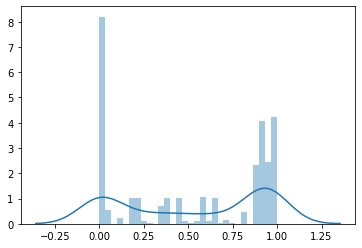

In [14]:
# Количество незаполеннных значений 
missing_val = df.isna().sum()#.sort_values(ascending  = False)

# и их доля от общего числа 
missing_val = missing_val/df.shape[0]

# распределение пропущенных значений 
sns.distplot(missing_val, bins  = 30)

# Необходимо поработать над пропущенными значениями в данных 

In [15]:
# В итоговую кластеризацию пойдут не все атрибуты 
# Создадим лист для тех атрибутов, которые возьмём в рассмотрение с учетом их смысла

features = []

### Детально рассмотрим каждую из групп атрибутов 

In [16]:
# Unnamed 

print('Повторяющихся значений: {}'.format(df['Unnamed: 0'].value_counts().max() - 1))
print('Незаполненных значений: {}'.format(df['Unnamed: 0'].isna().sum()))

Повторяющихся значений: 0
Незаполненных значений: 0


In [17]:
# Unnamed

df['Unnamed: 0'].value_counts()


1000    1
329     1
342     1
341     1
340     1
339     1
338     1
337     1
336     1
335     1
334     1
333     1
332     1
331     1
330     1
328     1
313     1
327     1
326     1
325     1
324     1
323     1
322     1
321     1
320     1
319     1
318     1
317     1
316     1
315     1
       ..
686     1
658     1
685     1
684     1
683     1
682     1
681     1
680     1
679     1
678     1
677     1
676     1
675     1
674     1
673     1
672     1
671     1
670     1
669     1
668     1
667     1
666     1
665     1
664     1
663     1
662     1
661     1
660     1
659     1
1       1
Name: Unnamed: 0, Length: 1000, dtype: int64

In [18]:
# Дропнем Unnamed т.к. не несет в себе значимого смысла для кластеризации 

df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
# respid 

print('Повторяющихся значений: {}'.format(df['respid'].value_counts().max() - 1))
print('Незаполненных значений: {}'.format(df['respid'].isna().sum()))

Повторяющихся значений: 0
Незаполненных значений: 0


In [20]:
# respid

df['respid'].value_counts()

2047    1
774     1
807     1
4845    1
4892    1
2798    1
4888    1
790     1
4885    1
4884    1
4881    1
779     1
3834    1
2824    1
775     1
5585    1
745     1
769     1
767     1
2813    1
2811    1
2810    1
761     1
5247    1
757     1
754     1
4847    1
4846    1
5132    1
899     1
       ..
1500    1
1436    1
3310    1
2184    1
3543    1
5588    1
5108    1
179     1
3536    1
3535    1
3530    1
5576    1
1479    1
1469    1
3516    1
3514    1
5561    1
5558    1
5122    1
1455    1
3501    1
5547    1
5546    1
3855    1
1446    1
5540    1
1442    1
1881    1
5533    1
5783    1
Name: respid, Length: 1000, dtype: int64

In [21]:
# Дропнем Unnamed т.к. не несет в себе значимого смысла для кластеризации 

df.drop(columns = ['respid'], 
        axis = 1, 
        inplace = True)

In [22]:
# q1 

print('Повторяющихся значений: {}'.format(df['q1'].value_counts().max() - 1))
print('Незаполненных значений: {}'.format(df['q1'].isna().sum()))

Повторяющихся значений: 516
Незаполненных значений: 0


In [23]:
# q1 
# Пол 

df['q1'].value_counts()


Žensko    517
Muško     483
Name: q1, dtype: int64

In [24]:
# q1 
# Числовой энкодинг

df['q1'] = df['q1'].map({'Žensko': 0, 'Muško': 1})

In [25]:
# Добавим в итоговый список фичей 

features.append('q1')

In [26]:
# q2 

print('Повторяющихся значений: {}'.format(df['q2'].value_counts().max() - 1))
print('Незаполненных значений: {}'.format(df['q2'].isna().sum()))

Повторяющихся значений: 58
Незаполненных значений: 0


In [27]:
# q2 
# С учетом атрибута 'hage', q2 - возраст  

df['q2'].value_counts()

33    59
35    54
42    51
32    48
40    48
29    47
30    46
38    42
27    41
34    40
39    40
41    39
46    36
47    36
26    36
49    35
45    35
44    34
31    33
28    33
36    33
43    33
37    30
25    28
48    27
50    16
Name: q2, dtype: int64

In [28]:
# Дропнем q2 - возраст(лет) и оставим возрастную группу hage 

df.drop(columns = ['q2'],
        axis = 1, 
        inplace = True)

In [29]:
# hage
# Возрастная группа 

df['hage'].value_counts(dropna = False)

30-34    226
40-44    205
35-39    199
25-29    185
45-50    185
Name: hage, dtype: int64

In [30]:
# Числовой энкодинг 
# В данном случае он допустим. Например, 25-29 отстоит от 45-50 дальше, чем от 30-34

D = {'25-29' : 0,
     '30-34' : 1,
     '35-39' : 2,
     '40-44' : 3,
     '45-50' : 4}

df['hage'] = df['hage'].map(D)

In [31]:
# hage

df['hage'].value_counts()

1    226
3    205
2    199
4    185
0    185
Name: hage, dtype: int64

In [32]:
# Добавим в итоговый список фичей 

features.append('hage')

In [33]:
# Атрибуты вида q4x_
# Судя по данным, характеризуют частоту каких-либо действий 

for clmn in df.filter(like = 'q4').columns:
    print(df[clmn].value_counts(dropna = False),'\n')
    
# Как часто вы покупаете продукты и предметы домашнего обихода в одном из этих магазинов?

# Магазин мелких товаров для дома
# Специализированный магазин
# Через Интернет

# q4x_ показывает частоту покупки в текстовом варианте по одному из трех указанных выше способов
# hq4_ показывает признак покупки в текстовом варианте по одному из трех указанных выше способов
# q4x... n показывает частоту покупки в числовом энкодинге по одному из трех указанных выше способов

Dnevno                        319
Jednom svakih par dana        295
Jedanput ili dvaput tjedno    235
Jednom svaka 2-4 tjedna       117
Jednom svaka 1-3 mjeseca       23
Jednom svakih 3-6 mjeseci       9
Rjede od svakih 6 mjeseci       2
Name: q4x1, dtype: int64 

Dnevno                        356
Jednom svakih par dana        207
Jedanput ili dvaput tjedno    154
Jednom svaka 2-4 tjedna       110
Jednom svaka 1-3 mjeseca       57
NaN                            52
Rjede od svakih 6 mjeseci      35
Jednom svakih 3-6 mjeseci      29
Name: q4x2, dtype: int64 

Jednom svaka 2-4 tjedna       215
Jedanput ili dvaput tjedno    204
Jednom svaka 1-3 mjeseca      132
NaN                           112
Jednom svakih par dana        111
Rjede od svakih 6 mjeseci      88
Jednom svakih 3-6 mjeseci      74
Dnevno                         64
Name: q4x3, dtype: int64 

NaN                           356
Rjede od svakih 6 mjeseci     204
Jednom svaka 1-3 mjeseca      185
Jednom svakih 3-6 mjeseci     112
J

In [34]:
# Оставим лишь частоту в числовом энкодинге. 
# Nan перекодируем в 0 и это будет означать, что не покупаются товары указанным в hq4_ путём.


df.drop(columns = ['q4x1', 'q4x2', 'q4x3', 'q4x4'], 
        axis = 1,
        inplace = True)

df.drop(columns = ['hq4_2', 'hq4_3', 'hq4_4'],
        axis =1, 
        inplace = True)

#q6_...m показывает перекодированный в число hq4_
df.drop(columns = ['q6_2m','q6_3m','q6_4m'],
        axis =1, 
        inplace = True)

In [35]:
# Заполним пропущенные значения у q4x...n

df[['q4x1n', 'q4x2n', 'q4x3n', 'q4x4n']] = df[['q4x1n', 'q4x2n', 'q4x3n', 'q4x4n']].fillna(0)

In [36]:
# Добавим в итоговый список фичей 

for clmn in ['q4x1n', 'q4x2n', 'q4x3n', 'q4x4n']:
    features.append(clmn)

In [37]:
# q5

print('Повторяющихся значений: {}'.format(df['q5'].value_counts().max() - 1))
print('Незаполненных значений: {}'.format(df['q5'].isna().sum()))

Повторяющихся значений: 229
Незаполненных значений: 0


In [38]:
# q5
# Хорошо заполненный числовой атрибут. Смысл его не понятен без описания 
# Не будем добавлять в набор фичей для кластеризации 

for clmn in df.filter(like = 'q5').columns:
    print(df[clmn].value_counts(dropna = False),'\n')

2000     230
3000     127
1500     124
1000     121
2500      78
4000      67
3500      34
5000      31
500       30
1200      26
800       19
600       12
700       12
1700       8
1800       8
1600       7
6000       7
4500       6
900        5
1300       4
2800       4
1400       3
200        3
100        3
20000      3
2300       2
2100       2
1100       2
400        2
2200       2
7000       2
10000      2
1250       1
80         1
1900       1
4250       1
5600       1
1590       1
750        1
300        1
15000      1
5500       1
654        1
650        1
3700       1
30         1
Name: q5, dtype: int64 



In [39]:
# q5
df.drop(columns = ['q5'],
        axis =1, 
        inplace = True)

In [40]:
# q6
# Судя по количеству незаполненных атрибутов, имеет прямое отношение к q4x...n
# Характеризует его как-то в числовом виде (возможно, количество покупок за период)
# Не будем добавлять его в итоговый набор фичей 

for clmn in df.filter(like = 'q6').columns:
    print(df[clmn].value_counts(dropna = False),'\n')

70     188
50     175
80     151
60     124
40      63
90      54
30      44
75      34
85      28
20      20
65      19
10      19
100     15
25       9
55       9
95       9
45       7
15       5
35       5
99       3
79       2
98       2
89       2
66       1
5        1
18       1
19       1
97       1
34       1
33       1
68       1
39       1
84       1
44       1
78       1
2        1
Name: q6_1, dtype: int64 

20.0    207
10.0    194
30.0    117
5.0      89
15.0     81
NaN      52
40.0     46
25.0     43
50.0     33
70.0     16
35.0     15
60.0     15
1.0      10
8.0       9
80.0      7
0.0       6
45.0      6
3.0       6
55.0      6
2.0       5
4.0       5
9.0       5
7.0       4
12.0      3
28.0      2
75.0      2
19.0      2
39.0      2
17.0      2
6.0       2
29.0      1
23.0      1
13.0      1
43.0      1
48.0      1
27.0      1
22.0      1
36.0      1
Name: q6_2, dtype: int64 

10.0    296
5.0     164
20.0    155
NaN     112
15.0     74
30.0     39
25.0     31
2.0      2

In [41]:
# q6
# Дроп атрибутов 

for clmn in df.filter(like = 'q6').columns:
    df.drop(columns = [clmn],
            axis =1, 
            inplace = True)

In [42]:
# q7 
# Частота каких-то действий. Вероятно, покупок, судя по q7_10_other
# Произведем энкодинг частоты, его можно совершить 
# т.к. ежедневно, например, отстоит дальше от раз в 3-6 месяцев чем от раз в неделю 


for clmn in df.filter(like = 'q7_').columns:
    print(df[clmn].value_counts(dropna = False))

Rjede od svakih 6 mjeseci     646
Jednom svakih 3-6 mjeseci     182
Jednom svaka 2-3 mjeseca      131
Jednom svaka 2-4 tjedna        29
Jedanput ili dvaput tjedno      6
Dnevno                          3
Jednom svakih par dana          3
Name: q7_1, dtype: int64
Rjede od svakih 6 mjeseci     439
Jednom svakih 3-6 mjeseci     218
Jednom svaka 2-3 mjeseca      208
Jednom svaka 2-4 tjedna        97
Jedanput ili dvaput tjedno     24
Dnevno                          8
Jednom svakih par dana          6
Name: q7_2, dtype: int64
Dnevno                        502
Jednom svakih par dana        341
Jedanput ili dvaput tjedno    118
Jednom svaka 2-4 tjedna        35
Rjede od svakih 6 mjeseci       2
Jednom svaka 2-3 mjeseca        2
Name: q7_3, dtype: int64
Jednom svakih par dana        310
Jedanput ili dvaput tjedno    261
Dnevno                        198
Jednom svaka 2-4 tjedna       172
Rjede od svakih 6 mjeseci      24
Jednom svaka 2-3 mjeseca       21
Jednom svakih 3-6 mjeseci      14
Name: q

In [43]:
# q7
# Дропнем поле с текстовым описанием товаров

df.drop(columns = ['q7_10_other'], 
        axis = 1, 
        inplace = True)

In [44]:
# q7
# Дропнем поле q7_10, которое, вероятно, завязано на текстовым описанием товаров

df.drop(columns = ['q7_10'], 
        axis = 1, 
        inplace = True)

In [45]:
# q7
# Произведём энкодинг аналогично q4x1n

D = {'Dnevno': 1,
     'Jednom svakih par dana': 2,
     'Jedanput ili dvaput tjedno':3,
     'Jednom svaka 2-4 tjedna':4,
     'Jednom svaka 2-3 mjeseca': 5,
     'Jednom svakih 3-6 mjeseci': 6,
     'Rjede od svakih 6 mjeseci': 7}

for clmn in df.filter(like = 'q7_').columns:
    df[clmn] = df[clmn].map(D)

In [46]:
# q7 
# Добавим в итоговый список фичей 

for clmn in df.filter(like = 'q7_').columns:
    features.append(clmn)

In [47]:
# q8
# Какие из следующих факторов важны для вас при выборе магазина?

# q8 показывает признак важности, q9 - вероятно, важность в числовом эквиваленте 


for clmn in df.filter(like = 'q8_').columns:
    print(df[clmn].value_counts(dropna = False))

Prakticnost pozicije ducana (Koji od sljedecih cimbenika su vam važni kad odlucujete u kojem cete ducanu kupovati?)    513
0                                                                                                                      487
Name: q8_1, dtype: int64
Izbor proizvoda u ducanu (Koji od sljedecih cimbenika su vam važni kad odlucujete u kojem cete ducanu kupovati?)    649
0                                                                                                                   351
Name: q8_2, dtype: int64
Cijena proizvoda (Koji od sljedecih cimbenika su vam važni kad odlucujete u kojem cete ducanu kupovati?)    880
0                                                                                                           120
Name: q8_3, dtype: int64
0                                                                                                                   604
Dostupne marke proizvoda (Koji od sljedecih cimbenika su vam važni kad odlucujete u kojem cete 

In [48]:
# q8
# Энкодинг и добавление в спиbсок итоговых фич 

for clmn in df.filter(like = 'q8_').columns:
    df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' else 1)
    features.append(clmn)
    

In [49]:
# q9
# Дроп т.к. уже есть характеризующий тот же смысл q8 

df.drop(columns = ['q9_1','q9_2','q9_3','q9_4','q9_5','q9_6','q9_7',
                    'q9_8','q9_9','q9_10','q9_11','q9_12','q9_13','q9_14','q9_15','q9_16','q9_17'],
        axis = 1,
        inplace = True)

In [50]:
# q10
# В каком из следующих супермаркетов вы делали покупки в прошлом месяце (30 дней)?
# one-hot-encoded набр значений 

# оставляем q10_.. из этой группы, дропаем q10_13 и q10_13_other, все hq10_...

for clmn in df.filter(like = 'q10_').columns:
    print(df[clmn].value_counts(dropna = False), '\n')

0                                                                                               640
Billa (U kojima od sljedecih supermarketa ste kupovali u posljednjih mjesec dana (30 dana)?)    360
Name: q10_1, dtype: int64 

0                                                                                             899
CBA (U kojima od sljedecih supermarketa ste kupovali u posljednjih mjesec dana (30 dana)?)    101
Name: q10_2, dtype: int64 

0                                                                                               916
Diona (U kojima od sljedecih supermarketa ste kupovali u posljednjih mjesec dana (30 dana)?)     84
Name: q10_3, dtype: int64 

0                                                                                                    963
Gavrilovic (U kojima od sljedecih supermarketa ste kupovali u posljednjih mjesec dana (30 dana)?)     37
Name: q10_4, dtype: int64 

Kaufland (U kojima od sljedecih supermarketa ste kupovali u posljednjih mjesec dan

In [51]:
# q10 
# оставляем q10_.. из этой группы, дропаем q10_13 и q10_13_other, все hq10_...
df.drop(columns = ['hq10_1','hq10_2','hq10_3','hq10_4','hq10_5','hq10_6','hq10_7',
                    'hq10_8','hq10_9','hq10_10','hq10_11','hq10_12','hq10_13','q10_13','q10_13_other'],
        axis = 1,
        inplace = True)

In [52]:
# q10
# Энкодинг 

for clmn in df.filter(like = 'q10_').columns:
    df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' else 1)

In [53]:
# q10
# Добавление в список итоговых фич 

for clmn in df.filter(like = 'q10_').columns:
    features.append(clmn)

In [54]:
# q11
# Какая-то числовая характеристика q10
# Возможно, число покупок за период, но явная зависимость с q10 есть 

for clmn in df.filter(like = 'q11_').columns:
    print(df[clmn].value_counts(dropna = False), '\n')

NaN      640
10.0     109
5.0       80
20.0      41
30.0      20
15.0      19
50.0      12
40.0      11
1.0        9
60.0       9
2.0        9
25.0       7
80.0       6
35.0       5
3.0        5
70.0       4
75.0       3
6.0        2
55.0       1
45.0       1
8.0        1
100.0      1
12.0       1
4.0        1
85.0       1
38.0       1
7.0        1
Name: q11_1, dtype: int64 

NaN     899
10.0     33
5.0      21
20.0     12
30.0      7
1.0       4
15.0      4
2.0       3
50.0      3
60.0      2
0.0       2
40.0      2
75.0      1
13.0      1
6.0       1
8.0       1
3.0       1
70.0      1
25.0      1
4.0       1
Name: q11_2, dtype: int64 

NaN      916
10.0      27
5.0       24
15.0       8
20.0       5
1.0        5
2.0        4
25.0       4
50.0       2
90.0       1
3.0        1
30.0       1
35.0       1
100.0      1
Name: q11_3, dtype: int64 

NaN     963
10.0     14
5.0      13
2.0       3
20.0      2
15.0      1
40.0      1
1.0       1
3.0       1
7.0       1
Name: q11_4, dtype: int

In [55]:
# q11
# Дроп атрибуты 

for clmn in df.filter(like = 'q11_').columns:
    df.drop(columns = [clmn],
        axis = 1,
        inplace = True)

In [56]:
# q12


for clmn in df.filter(like = 'q12x').columns:
    print(df[clmn].value_counts(dropna = False))

NaN                                    640
0                                      224
Prakticnost pozicije ducana (Billa)    136
Name: q12x1_1, dtype: int64
NaN                                 640
0                                   241
Izbor proizvoda u ducanu (Billa)    119
Name: q12x1_2, dtype: int64
NaN                         640
0                           217
Cijena proizvoda (Billa)    143
Name: q12x1_3, dtype: int64
NaN                                 640
0                                   266
Dostupne marke proizvoda (Billa)     94
Name: q12x1_4, dtype: int64
NaN                             640
0                               217
Radno vrijeme ducana (Billa)    143
Name: q12x1_5, dtype: int64
NaN                                   640
0                                     284
Velicina i raspored ducana (Billa)     76
Name: q12x1_6, dtype: int64
NaN                                                                                                               640
0              

In [57]:
# q12 
# Фичи из этой группы представляют из себя one-hot-encoded ответы в разрезе 12 магазинов, выбранных в q10 
# Их 234! В черновике пробовал использовать все атрибуты, ничего хорошего не получилось 

# Т.к. сейчас пыпытка отобарать атрибуты по их смысловому значению 
# (список выбранных магазинов, частота каких-либой действий и т.д)
# в текущем варианте эту группу использовать не будем

df.filter(like = 'q12x').columns.shape

(234,)

In [58]:
# q12
# Дроп атрибуты 

for clmn in df.filter(like = 'q12').columns:
    df.drop(columns = [clmn],
        axis = 1,
        inplace = True)

In [59]:
# q13 

# Из них, в какой программе лояльности вы участвуете? 
# Оставляем атрибут 

for clmn in df.filter(like = 'q13_').columns:
    if clmn != 'q13_6_8':
        print(df[clmn].value_counts(dropna = False))

NaN                                                                                                   640
Billa (Rekli ste da kupujete u ^f('hQ10')^. Od navedenih, u cijem programu vjernosti sudjelujete?)    189
0                                                                                                     171
Name: q13_1, dtype: int64
NaN                                                                                                 899
0                                                                                                    84
CBA (Rekli ste da kupujete u ^f('hQ10')^. Od navedenih, u cijem programu vjernosti sudjelujete?)     17
Name: q13_2, dtype: int64
NaN                                                                                                   916
0                                                                                                      81
Diona (Rekli ste da kupujete u ^f('hQ10')^. Od navedenih, u cijem programu vjernosti sudjelujete?)      3


In [60]:
# q13
# Энкодинг 

for clmn in df.filter(like = 'q13').columns:
        if clmn != 'q13_6_8':
            df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' or x != x  else 1)

In [61]:
# q13 
# Дроп варианты 'Нет', 'Другое'

df.drop(columns = ['q13_99', 'q13_13'], 
        axis = 1, 
        inplace = True)

In [62]:
# q13 
# Дроп атрибут q13_6_8 - его смысл не понятен 

df.drop(columns = ['q13_6_8'], 
        axis = 1, 
        inplace = True)

In [63]:
# q13
# Добавим в список фичей 

for clmn in df.filter(like = 'q13_').columns:
    features.append(clmn)

In [64]:
# q14 

# Ответы касательно конкретных магазинов, аналогично q12

for clmn in df.filter(like = 'q14').columns:
    print(df[clmn].value_counts(dropna = False))

                                                                                                                                                          949
novcani kuponi                                                                                                                                              2
stalno novi proizvodi                                                                                                                                       1
program vjernosti koji je vezan za djecu i proizvo                                                                                                          1
zamjena bodova za kupone (u novcu)                                                                                                                          1
zamjena za bodove za neki proizvod                                                                                                                          1
Skupljanje bodova u zamjenu za kune                 

In [65]:
# q14
# Дроп атрибуты 

for clmn in df.filter(like = 'q14').columns:
    df.drop(columns = [clmn],
        axis = 1,
        inplace = True)

In [66]:
# version
# странный атрибут

df['version'].value_counts(dropna = False)

20    50
19    50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
13    50
14    50
15    50
16    50
17    50
18    50
1     50
Name: version, dtype: int64

In [67]:
# version
# Дроп его 

df.drop(columns = ['version'], 
        axis = 1, 
        inplace = True)

In [68]:
# q15
# Похоже на описание акционного купона

for clmn in df.filter(like = 'q15').columns:
    print(df[clmn].value_counts(dropna = False))

Primit cete 1 bod za svaku kunu ^f('attr11')^ koju potrošite prilikom jedne kupovine ^f('attr12')^Kada sakupite ^f('attr    200
Primit cete 1 bod za svaku kunu ^f('attr21')^ koju potrošite prilikom jedne kupovine ^f('attr22')^Kada sakupite ^f('attr    181
Primit cete 1 bod za svaku kunu ^f('attr41')^ koju potrošite prilikom jedne kupovine ^f('attr42')^Kada sakupite ^f('attr    169
Nijedan                                                                                                                     157
Primit cete 1 bod za svaku kunu ^f('attr51')^ koju potrošite prilikom jedne kupovine ^f('attr52')^Kada sakupite ^f('attr    151
Primit cete 1 bod za svaku kunu ^f('attr31')^ koju potrošite prilikom jedne kupovine ^f('attr32')^Kada sakupite ^f('attr    142
Name: q15_12, dtype: int64


In [69]:
# version
# Дроп его 

df.drop(columns = ['q15_12'], 
        axis = 1, 
        inplace = True)

In [70]:
# q16

# Да/Нет без описания 
for clmn in df.filter(like = 'q16').columns:
    print(df[clmn].value_counts(dropna = False))

Ne    883
Da    117
Name: q16_1, dtype: int64
Da    700
Ne    300
Name: q16_2, dtype: int64
Ne    830
Da    170
Name: q16_3, dtype: int64
Ne    609
Da    391
Name: q16_4, dtype: int64
Ne    884
Da    116
Name: q16_5, dtype: int64
Ne    932
Da     68
Name: q16_6, dtype: int64
NaN    574
Da     264
Ne     162
Name: q16_7, dtype: int64
                                                                                                                                                          575
dm                                                                                                                                                         41
ništa                                                                                                                                                      20
ne                                                                                                                                                         14
drogerija                        

In [71]:
# q16
# Дроп атрибуты 

for clmn in df.filter(like = 'q16').columns:
    df.drop(columns = clmn, 
        axis = 1, 
        inplace = True)

In [72]:
# q17
# Какие заправки?

for clmn in df.filter(like = 'q17').columns:
    print(df[clmn].value_counts(dropna = False))

NaN                              883
0                                 86
OMV (Kojih benzinskih crpki?)     31
Name: q17_1, dtype: int64
NaN                                883
0                                  114
Shell (Kojih benzinskih crpki?)      3
Name: q17_2, dtype: int64
NaN                                 883
0                                    95
Lukoil (Kojih benzinskih crpki?)     22
Name: q17_3, dtype: int64
NaN                                       883
0                                          84
Petrol group (Kojih benzinskih crpki?)     33
Name: q17_4, dtype: int64
NaN                                                  883
0                                                     65
Ostalo, molimo navedite (Kojih benzinskih crpki?)     52
Name: q17_5, dtype: int64
                                                                                                                                                          948
tifon                                                  

In [73]:
# q17
# Дроп категорию other 

df.drop(columns = ['q17_5','q17_5_other'], 
        axis = 1 , 
        inplace = True)

In [74]:
# q17
# Энкодинг 

for clmn in df.filter(like = 'q17').columns:
    df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' or x != x  else 1)

In [75]:
# q17 
# Добавим атрибуты в итоговую выборку 

for clmn in df.filter(like = 'q17').columns:
    features.append(clmn)

In [76]:
# q18
# На каких из следующих заправок вы приобрели / заправились в прошлом месяце?
# В q18_6_other часто встречается 'INA'
# преобразуем q18_6_other в признак того, что заправлялись на 'INA'

for clmn in df.filter(like = 'q18').columns:
    print(df[clmn].value_counts(dropna = False))

0                                                                                                     724
OMV (U kojima od sljedecih benzinskih crpki ste kupovali/punili gorivo u posljednjih mjesec dana?)    276
Name: q18_1, dtype: int64
0                                                                                                       992
Shell (U kojima od sljedecih benzinskih crpki ste kupovali/punili gorivo u posljednjih mjesec dana?)      8
Name: q18_2, dtype: int64
0                                                                                                        839
Lukoil (U kojima od sljedecih benzinskih crpki ste kupovali/punili gorivo u posljednjih mjesec dana?)    161
Name: q18_3, dtype: int64
0                                                                                                              710
Petrol group (U kojima od sljedecih benzinskih crpki ste kupovali/punili gorivo u posljednjih mjesec dana?)    290
Name: q18_4, dtype: int64
Ostalo, molimo naved

In [77]:
# q18 
# Энкодинг

for clmn in df.filter(like = 'q18').columns:
        if clmn != 'q18_5_other':
            df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' or x != x  else 1)

In [78]:
# q18 
# преобразуем q18_6_other в признак того, что заправлялись на 'INA'

df['q18_5_other'] = df['q18_5_other'].apply(lambda x: 1 if 'ina' in x.lower() else 0)

In [79]:
# q18 
# дроп категорию other 

df.drop(columns = ['q18_5'], axis = 1, inplace = True)

In [80]:
# q18
# Добавим атрибуты в итоговую выборку 

for clmn in df.filter(like = 'q18').columns:
    features.append(clmn)

In [81]:
# q19 
# в каком из следующих магазинов вы покупали одежду и аксессуары за последние 3 месяца?

for clmn in df.filter(like = 'q19').columns:
    print(df[clmn].value_counts(dropna = False))

0                                                                                                           877
Benetton (A u kojima od sljedecih ducana odjecom i modnim dodacima ste kupovali u posljednja 3 mjeseca?)    123
Name: q19_1, dtype: int64
0                                                                                                                           834
Bershka/Stradivarius/Pull & Bear/Massimo Dutti/ZARA (A u kojima od sljedecih ducana odjecom i modnim dodacima ste kupova    166
Name: q19_2, dtype: int64
DM (A u kojima od sljedecih ducana odjecom i modnim dodacima ste kupovali u posljednja 3 mjeseca?)    641
0                                                                                                     359
Name: q19_3, dtype: int64
0                                                                                                          971
Douglas (A u kojima od sljedecih ducana odjecom i modnim dodacima ste kupovali u posljednja 3 mjeseca?)     29
Name: q1

In [82]:
# q19
# Дроп описание other 

df.drop(columns = ['q19_21_other'], axis = 1, inplace = True)

In [83]:
# q19
# Дроп категории other и нет

df.drop(columns = ['q19_21','q19_22'], 
        axis = 1, 
        inplace = True)

In [84]:
# q19 
# Энкодинг 

for clmn in df.filter(like = 'q19').columns:
    df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' else 1)

In [85]:
# q19
# Добавим атрибуты в итоговую выборку 

for clmn in df.filter(like = 'q19').columns:
    features.append(clmn)

In [86]:
# q20 не нужен, есть q20_...n
# Вопрос о какой-то частоте действия 

for clmn in df.filter(like = 'q20').columns:
    print(df[clmn].value_counts(dropna = False))

Nikad           498
Vrlo rijetko    245
Rijetko         173
Cesto            60
Vrlo cesto       24
Name: q20_1, dtype: int64
Cesto           401
Rijetko         221
Vrlo cesto      165
Vrlo rijetko    127
Nikad            86
Name: q20_2, dtype: int64
Vrlo cesto      315
Cesto           315
Rijetko         141
Nikad           127
Vrlo rijetko    102
Name: q20_3, dtype: int64
Nikad           323
Vrlo rijetko    216
Rijetko         213
Cesto           172
Vrlo cesto       76
Name: q20_4, dtype: int64
Nikad           602
Vrlo rijetko    166
Rijetko         139
Cesto            64
Vrlo cesto       29
Name: q20_5, dtype: int64
Cesto           374
Rijetko         222
Vrlo cesto      187
Vrlo rijetko    121
Nikad            96
Name: q20_6, dtype: int64
Nikad           297
Rijetko         244
Cesto           215
Vrlo rijetko    171
Vrlo cesto       73
Name: q20_7, dtype: int64
0    916
1     84
Name: q20_1n, dtype: int64
1    566
0    434
Name: q20_2n, dtype: int64
1    630
0    370
Name: q20_

In [87]:
# q20 не нужен, есть q20_...n

df.drop(columns = ['q20_1', 'q20_2', 'q20_3', 'q20_4', 'q20_5', 'q20_6', 'q20_7'], 
        axis = 1 , 
        inplace = True) 

In [88]:
# q20
# Добавим атрибуты в итоговую выборку 

for clmn in df.filter(like = 'q20').columns:
    if clmn not in ['q20_count', 'q20_final']:
        features.append(clmn)

In [89]:
# q21 - аналогично q20
# Вопрос о какой-то частоте действия 

for clmn in df.filter(like = 'q21').columns:
    print(df[clmn].value_counts(dropna = False),'\n')

Nikad           313
Vrlo rijetko    273
Rijetko         252
Cesto           121
Vrlo cesto       41
Name: q21_1, dtype: int64 

Cesto           395
Vrlo cesto      225
Rijetko         203
Vrlo rijetko    116
Nikad            61
Name: q21_2, dtype: int64 

Vrlo cesto      354
Cesto           280
Rijetko         153
Vrlo rijetko    122
Nikad            91
Name: q21_3, dtype: int64 

Nikad           266
Rijetko         231
Cesto           207
Vrlo rijetko    205
Vrlo cesto       91
Name: q21_4, dtype: int64 

Nikad           446
Vrlo rijetko    230
Rijetko         183
Cesto            95
Vrlo cesto       46
Name: q21_5, dtype: int64 

Cesto           377
Vrlo cesto      219
Rijetko         202
Vrlo rijetko    128
Nikad            74
Name: q21_6, dtype: int64 

Cesto           288
Rijetko         264
Vrlo rijetko    194
Nikad           135
Vrlo cesto      119
Name: q21_7, dtype: int64 

0    838
1    162
Name: q21_1n, dtype: int64 

1    620
0    380
Name: q21_2n, dtype: int64 

1    634
0

In [90]:
# q21 не нужен, есть q21_...n

df.drop(columns = ['q21_1', 'q21_2', 'q21_3', 'q21_4', 'q21_5', 'q21_6', 'q21_7'], 
        axis = 1 , 
        inplace = True) 

In [91]:
# q21
# Добавим атрибуты в итоговую выборку 

for clmn in df.filter(like = 'q21').columns:
    if clmn not in ['q21_count', 'q21_final']:
        features.append(clmn)

In [92]:
# q22 
# Тоже вопрос о частоте действия 

df['q22'].value_counts(dropna = False)

1-4 puta dnevno            439
Više od 10 puta dnevno     212
5-9 puta dnevno            128
Jednom tjedno               95
Rjede                       92
Jednom mjesecno             24
Jednom svaka dva tjedna     10
Name: q22, dtype: int64

In [93]:
# q22 Энкодинг

D = {'Više od 10 puta dnevno' : 1,
     '5-9 puta dnevno' : 2,
     '1-4 puta dnevno' : 3,
     'Jednom tjedno' : 4,
     'Jednom svaka dva tjedna' : 5,
     'Jednom mjesecno' : 6,
     'Rjede' : 7}

df['q22'] = df['q22'].map(D).fillna(0)

In [94]:
# q22 энкодинг 
# Добавим атрибут в итоговую выборк
features.append('q22')

In [95]:
# q23 - аналогично q22 
df['q23'].value_counts()

Rjede                      765
Jednom tjedno               81
Jednom mjesecno             64
1-4 puta dnevno             40
Jednom svaka dva tjedna     35
Više od 10 puta dnevno      11
5-9 puta dnevno              4
Name: q23, dtype: int64

In [96]:
# q23 энкодинг 


df['q23'] = df['q23'].map(D)

In [97]:
# q23 энкодинг 
# Добавим атрибут в итоговую выборк

features.append('q23')

In [98]:
# q24
# как хотите получать информацию, вероятно 

# Через листовки 381
# По электронной почте 340
# С помощью телевизионной рекламы 107
# Через социальные сети 73
# Через мобильные приложения 36
# Я не хочу, чтобы меня информировали 34

df['q24'].value_counts()

Putem letaka                   381
Putem elektronske pošte        340
Putem televizijskih reklama    107
Putem društvenih mreža          73
Putem mobilnih aplikacija       36
Ne želim biti obaviješten       34
Na otvorenom                    10
Putem radija                    10
Ostalo, molimo navedite:         9
Name: q24, dtype: int64

In [99]:
df.drop(columns = ['q24'], 
        axis = 1 , 
        inplace = True) 

In [100]:
# q25 
# Совсем не понятно, что характеризует атрибут и почему он текстом описывает цифры 
# Не будем перекодировать и дропнем 

df['q25'].value_counts()

Cetiri         291
Tri            275
Dva            161
Pet            146
Više od pet     85
Jedan           42
Name: q25, dtype: int64

In [101]:
df.drop(columns = ['q25'], 
        axis = 1 , 
        inplace = True) 

In [102]:
# q26
# Кто еще, кроме вас, живет в вашем доме?

for clmn in df.filter(like = 'q26').columns:
    print(df[clmn].value_counts(dropna = False))

Vaš suprug/Vaša supruga/Vaš partner (Tko još, osim Vas, živi u Vašem kucanstvu?)    701
0                                                                                   257
NaN                                                                                  42
Name: q26_1, dtype: int64
0                                                                              758
Djeca dobi od 18 i više godina (Tko još, osim Vas, živi u Vašem kucanstvu?)    200
NaN                                                                             42
Name: q26_2, dtype: int64
0                                                                             741
Djeca dobi od 12 do 17 godina (Tko još, osim Vas, živi u Vašem kucanstvu?)    217
NaN                                                                            42
Name: q26_3, dtype: int64
0                                                                            712
Djeca dobi od 6 do 11 godina (Tko još, osim Vas, živi u Vašem kucanstvu?)    246
N

In [103]:
# Дроп остальное 

df.drop(columns = ['q26_7'], 
        axis = 1 , 
        inplace = True) 

In [104]:
# q26 
# Энкодинг 

for clmn in df.filter(like = 'q26').columns:
    df[clmn] = df[clmn].apply(lambda x: 0 if x == '0' or x != x  else 1)

In [105]:
# q26 
# Добавим в итоговую выборку 

for clmn in df.filter(like = 'q26').columns:
        features.append(clmn)

In [106]:
# q28
# Похоже на зарплату ... ?

df['q28'].value_counts()

5 000 – 10 000 HRK       415
Manje od 5 000 HRK       230
Ne želim se izjasniti    155
10 001 – 15 000 HRK      141
15 001 – 20 000 HRK       41
20 001 – 25 000 HRK       14
25 001 – 30 000 HRK        2
Više od 30 000 HRK         2
Name: q28, dtype: int64

In [107]:
# q28 
# Произведем one-hot-encoding 

df[['q28_1','q28_2','q28_3','q28_4','q28_5','q28_6','q28_7','q28_8']] = pd.get_dummies(df['q28'])

In [108]:
# Дроп исходник
df.drop(columns = ['q28'], axis = 1, inplace = True)

In [109]:
# q28 
# Добавим в итоговую выборку 

for clmn in df.filter(like = 'q28').columns:
        features.append(clmn)

In [110]:
# FAC
# Атрибут с плохой заполняемостью 

for clmn in df.filter(like = 'FAC').columns:
    print(df[clmn].value_counts(dropna = False))

 NaN         986
 0.565800      1
-1.217206      1
-1.166462      1
 0.842306      1
 0.404405      1
 0.663627      1
-0.679728      1
-1.908511      1
-0.095158      1
-0.282022      1
-0.359588      1
 0.538969      1
 0.970128      1
 1.723441      1
Name: FAC1_1, dtype: int64
 NaN         986
 0.610478      1
 0.132180      1
 0.288116      1
 0.030839      1
 0.777309      1
-0.161546      1
 0.338547      1
-2.540740      1
 0.576865      1
-1.868775      1
 1.153848      1
 0.101579      1
 0.306121      1
 0.255179      1
Name: FAC2_1, dtype: int64
 NaN         986
-0.374101      1
 0.162115      1
 0.749631      1
 0.803970      1
 0.716575      1
-0.993683      1
-2.937169      1
-0.319825      1
 0.793570      1
-0.187645      1
 0.637586      1
 0.433343      1
 0.297272      1
 0.218361      1
Name: FAC3_1, dtype: int64
 NaN         986
-0.924680      1
 0.485933      1
-1.997012      1
 0.810519      1
 0.958035      1
 0.934822      1
-0.070176      1
 1.026229      1
-

In [111]:
# FAC
# Дроп его 

for clmn in df.filter(like = 'FAC').columns:
    df.drop( columns = [clmn], axis = 1, inplace = True)

In [112]:
# QCL

for clmn in df.filter(like = 'QCL').columns:
    print(df[clmn].value_counts(dropna = False))

NaN    986
2.0     11
1.0      2
3.0      1
Name: QCL_1, dtype: int64
3    374
2    339
1    287
Name: QCL_2, dtype: int64


In [113]:
# QCL
# Дроп атрибут с плохой заполняемостью 

df.drop(columns = ['QCL_1'], axis = 1, inplace = True)

In [114]:
# QCL
# Второй оставим 

features.append('QCL_2')

In [115]:
# q20_

df['q20_final'].value_counts()

2 to 4 activities        561
None                     313
5 and more activities    126
Name: q20_final, dtype: int64

In [116]:
# q20_

df['q20_count'].value_counts()

2    230
1    198
3    190
4    141
0    115
5     90
6     24
7     12
Name: q20_count, dtype: int64

In [117]:
# q20_
# Для маппинга берем нижнюю грань 

D = {'2 to 4 activities' : 2,
     '5 and more activities' : 5}

df['q20_final'] = df['q20_final'].map(D).fillna(0)


In [118]:
# q20_
# Дроп некатегориальный атрибут 

df.drop(columns = ['q20_count'], axis = 1, inplace = True)

In [119]:
# q20_
# добавим категориальный в выборку атрибутов

features.append('q20_final')

In [120]:
# q21 

df['q21_final'].value_counts()

2 to 4 activities        517
None                     284
5 and more activities    199
Name: q21_final, dtype: int64

In [121]:
# q21_
# Для маппинга берем нижнюю грань 

D = {'2 to 4 activities' : 2,
     '5 and more activities' : 5}

df['q21_final'] = df['q21_final'].map(D).fillna(0)


In [122]:
# q21 

df['q21_final'].value_counts()

2.0    517
0.0    284
5.0    199
Name: q21_final, dtype: int64

In [123]:
# q21_
# добавим категориальный в выборку атрибутов

features.append('q21_final')

In [124]:
# q21_
# Дроп некатегориальный атрибут 

df.drop(columns = ['q21_count'], axis = 1, inplace = True)

### Далее используем те фичи, которые отобрали в процессе подготовки данных

In [125]:
# Новый рабочий датасет 

data = df[features]

In [126]:
# Количество используемых атрибутов 

len(features)

119

In [127]:
# Поиск полных дубликатов

duplicated_features = get_Duplicate_Columns(data)
print('Дублирующие атрибуты : \n{}'.format(duplicated_features))

# Таковых нет

Дублирующие атрибуты : 
[]


In [128]:
# Лист атрибутов с постоянными значениями

redundant_features = get_Redundant_Features(data)
print('Атрибуты с единственным значением: \n{}'.format(redundant_features))

Атрибуты с единственным значением: 
[]


In [129]:
# Рассмотрим корреляцию между фичами

corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                          k = 1).astype(np.bool))
corr_values = [column for column in upper.columns if any(upper[column] > 0.9)]

print('Коррелирующие атрибуты: \n{}'.format(corr_values))

# Таковых нет

Коррелирующие атрибуты: 
[]


In [130]:
# Импорт необходимых либ 

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Количество необходимых групп/кластеров неизвестно.
##### Воспользуемся Agglomerative Hierarchical Clustering и построим дендограмму для наглядного определения количества кластеров 

In [131]:
# Построим distance matrix 

d = pdist(data)

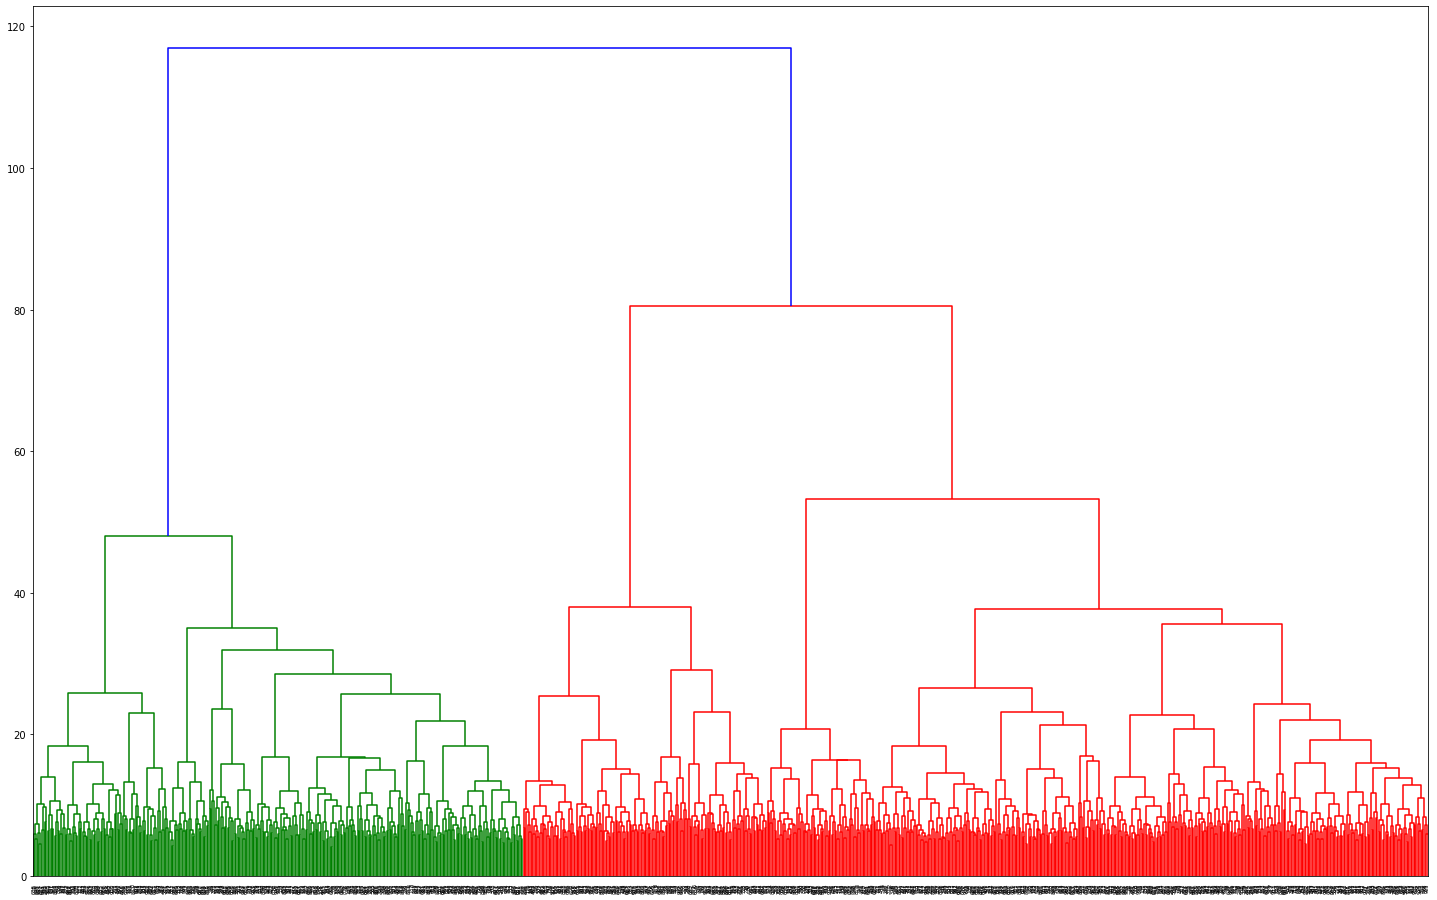

In [132]:
# Построим дендограмму 

linked = linkage(d, 'ward')

plt.figure(figsize=(25, 16))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

# Попробуем выделить три кластера 
# При попытке кластеризации со всеми фичами после предобработки кластеры делились примерно на хорошую/плохую заполняемость
# (т.е. 1/0)



In [133]:
# Обсчет модели c тремя кластерами 

model = AgglomerativeClustering(n_clusters = 3, 
                                linkage='ward')
model.fit_predict(data)
labels = model.labels_

In [134]:
# новый датафрейм с результатами

res_df = data
res_df['group'] = labels
res_df['group'].value_counts()

0    474
1    351
2    175
Name: group, dtype: int64

Text(0, 0.5, 'группы')

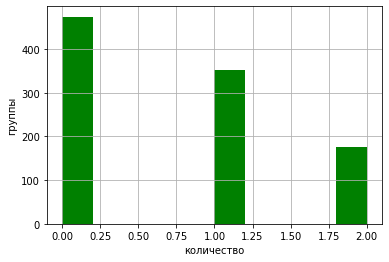

In [135]:
# Распределение классов 

ax = res_df['group'].hist(color='green')
ax.set_xlabel("количество")
ax.set_ylabel("группы")

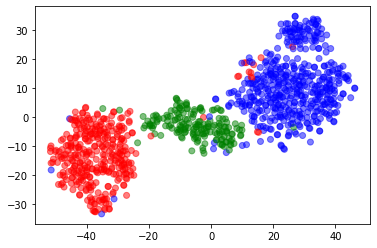

In [136]:
# Визуализируем кластеры с помощью t-SNE

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(res_df)

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c = res_df['group'].map({0: 'blue', 1: 'red', 2: 'green'}), alpha=.5);

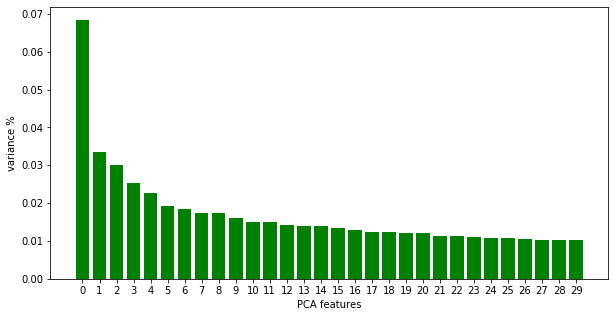

In [137]:
# Посмотрим на возможное количество кластеров при помощи kMeans и Elbow_Method
# Выделим principal components и тем самым уменьшим размерность 

X_std = StandardScaler().fit_transform(data)
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(X_std)



# Визуализация объясненной дисперсии компонент 
features = range(pca.n_components_)

plt.figure(figsize=(10, 5))
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


PCA_components = pd.DataFrame(principalComponents)

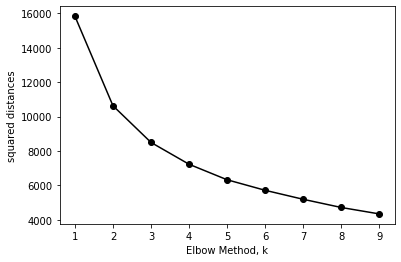

In [138]:
# Визуализация Elbow Method
# Судя по нему, 3 кластера действительно можно выделить 

ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Elbow Method, k')
plt.ylabel('squared distances')
plt.xticks(ks)
plt.show()

In [139]:
# Оценим силуэты кластеров при помощи Silhouette index для следующих алгоритмов: 
# 1. Agglomerative Hierarchical Clustering
# 2. KMeans, euclidean distance 
# 3. KMeans, cosine distance 


from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3).fit(data)

normalized_vectors = preprocessing.normalize(data)
normalized_kmeans = KMeans(n_clusters = 3).fit(normalized_vectors)


hh = AgglomerativeClustering(n_clusters = 3, linkage='ward')
hh.fit(data)



print('kmeans: {}'.format(silhouette_score(data, kmeans.labels_, 
                                           metric='euclidean')))

print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors,
                                                 normalized_kmeans.labels_,
                                                 metric='cosine')))


print('Agglomerative Clustering: {}'.format(silhouette_score(data,
                                                 hh.labels_,
                                                 metric='euclidean')))

kmeans: 0.13311629707386022
Cosine kmeans: 0.2518154870247881
Agglomerative Clustering: 0.1278481159610397


In [140]:
res_df['group_hierarch'] = hh.labels_
res_df['group_kmeans_norm'] = normalized_kmeans.labels_
res_df['group_kmeans'] = kmeans.labels_

In [141]:
# Дейтсвительно, большая часть составляющей кластеров пересекается 

res_df.groupby(['group_hierarch',
                'group_kmeans_norm',
                'group_kmeans']).group_hierarch.agg('count').to_frame('count').reset_index().sort_values(by=['count'], ascending = False)

,group_hierarch,group_kmeans_norm,group_kmeans,count
1,0,0,1,446
8,1,1,2,330
12,2,2,0,171
3,0,2,0,17
6,1,0,1,6
9,1,2,0,6
0,0,0,0,5
2,0,1,2,5
10,2,0,1,4
7,1,0,2,3


In [142]:
# Лучше показал себя kMeans с cosine distance
# Выберем его за эталоном этой итерации 
# Остальные дропнем 

res_df.drop(columns = ['group_hierarch', 'group_kmeans', 'group'], 
            axis = 1, 
            inplace = True)

In [143]:
from sklearn.ensemble import RandomForestClassifier

# При помощи верхнеуровневого построения Random Forest определим фичи, вносящие наибольший вклад в определение групп 
# Это позволит уменьшить размерность и избавить от лишних шумов 
# далее повторим сравнение результатов работы алгоритмов 

X, y = data.iloc[:,:-1], data.iloc[:,-1]

clf = RandomForestClassifier(n_estimators = 500).fit(X, y)

indices = np.argsort(clf.feature_importances_)[:len(X.columns) - 20:-1]
ifeatures = X.columns[indices]
importances = clf.feature_importances_[indices]

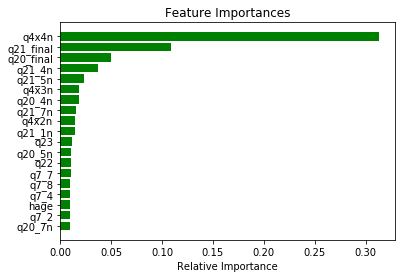

In [144]:
# Feature Importances

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[::-1], color='green')
plt.yticks(range(len(indices)), ifeatures[::-1])
plt.xlabel('Relative Importance')
plt.show()

In [145]:
# Пересоберём датасет с урезанной размерностью 

data = df[ifeatures]

In [146]:
# Вновь оценим силуэты кластеров при помощи Silhouette index для следующих алгоритмов: 
# 1. Agglomerative Hierarchical Clustering
# 2. KMeans, euclidean distance 
# 3. KMeans, cosine distance 

kmeans = KMeans(n_clusters = 3).fit(data)

normalized_vectors = preprocessing.normalize(data)
normalized_kmeans = KMeans(n_clusters = 3).fit(normalized_vectors)


hh = AgglomerativeClustering(n_clusters = 3, linkage='ward')
hh.fit(data)



print('kmeans: {}'.format(silhouette_score(data, kmeans.labels_, 
                                           metric='euclidean')))

print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                                 normalized_kmeans.labels_,
                                                 metric='cosine')))


print('Agglomerative Clustering:{}'.format(silhouette_score(data,
                                                 hh.labels_,
                                                 metric='euclidean')))

kmeans: 0.1974944373845532
Cosine kmeans:0.35680978828373655
Agglomerative Clustering:0.19133191511961808


In [147]:
res_df['group_hierarch'] = hh.labels_
res_df['group_kmeans_norm'] = normalized_kmeans.labels_
res_df['group_kmeans'] = kmeans.labels_

In [148]:
# Дейтсвительно, большая часть составляющей кластеров пересекается 

res_df.groupby(['group_hierarch',
                'group_kmeans_norm',
                'group_kmeans']).group_hierarch.agg('count').to_frame('count').reset_index().sort_values(by=['count'], ascending = False)

,group_hierarch,group_kmeans_norm,group_kmeans,count
4,0,2,1,456
7,1,1,0,334
11,2,0,2,149
1,0,0,2,31
10,2,0,1,7
5,0,2,2,5
2,0,1,0,4
0,0,0,1,3
3,0,2,0,3
13,2,2,1,3


In [149]:
# Оставляем результат kMeans с cosine distance
# его  Silhouette index улучшился после уреза размерности   
# Остальные дропнем 

res_df.drop(columns = ['group_hierarch', 'group_kmeans'], 
            axis = 1, 
            inplace = True)

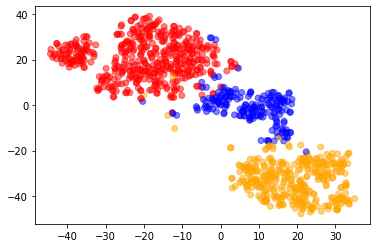

In [150]:
# Визуализируем результирующие кластеры 

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(normalized_vectors)

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=res_df['group_kmeans_norm'].map({0: 'blue', 1: 'orange', 2: 'red'}), alpha=.5);

Text(0, 0.5, 'группы')

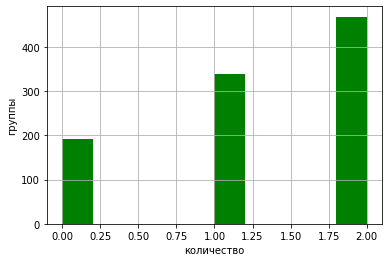

In [151]:
# Распределение классов 

ax = res_df['group_kmeans_norm'].hist(color='green')
ax.set_xlabel("количество")
ax.set_ylabel("группы")

Text(0.5, 0, 'q4x4n')

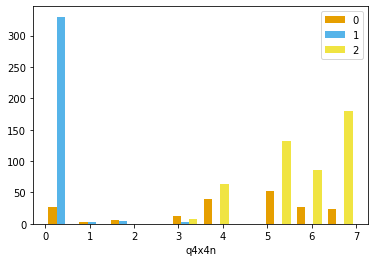

In [152]:
# q4x4n 
# ответ Онлайн на вопрос 'как часто вы покупаете продукты и товары для дома в одном из этих магазинов?'

# Заметно явное отличие кластера 1 от кластеров 0 и 2  

x0 = list(res_df[res_df['group_kmeans_norm'] == 0]['q4x4n'])
x1 = list(res_df[res_df['group_kmeans_norm'] == 1]['q4x4n'])
x2 = list(res_df[res_df['group_kmeans_norm'] == 2]['q4x4n'])


colors = ['#E69F00', '#56B4E9', '#F0E442']
names = [0, 1, 2]
         
plt.hist([x0, x1, x2],
         color = colors, 
         label = names)

plt.legend()
plt.xlabel('q4x4n')

Text(0.5, 0, 'q21_final')

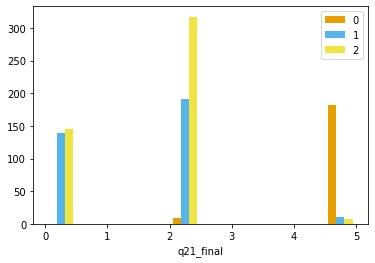

In [153]:
# q21_final
# Частота каких-то действий

# Заметно явное отличие кластера 0 от кластеров 1 и 2  

x0 = list(res_df[res_df['group_kmeans_norm'] == 0]['q21_final'])
x1 = list(res_df[res_df['group_kmeans_norm'] == 1]['q21_final'])
x2 = list(res_df[res_df['group_kmeans_norm'] == 2]['q21_final'])

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = [0, 1, 2]
         
plt.hist([x0, x1, x2],
         color = colors, 
         label = names)

plt.legend()
plt.xlabel('q21_final')

Text(0.5, 0, 'q20_final')

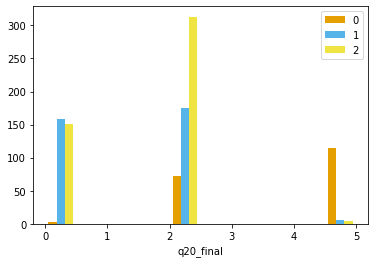

In [154]:
# q20_final
# Частота каких-то действий

# Заметно явное отличие кластера 0 от кластеров 1 и 2 

x0 = list(res_df[res_df['group_kmeans_norm'] == 0]['q20_final'])
x1 = list(res_df[res_df['group_kmeans_norm'] == 1]['q20_final'])
x2 = list(res_df[res_df['group_kmeans_norm'] == 2]['q20_final'])

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = [0, 1, 2]
         
plt.hist([x0, x1, x2], 
         color = colors, 
         label = names)

plt.legend()
plt.xlabel('q20_final')

Text(0.5, 0, 'q21_4n')

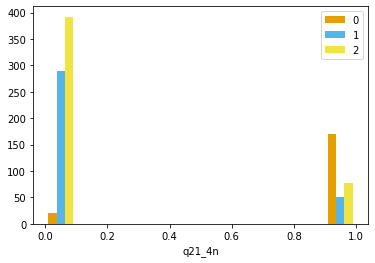

In [155]:
# q21_4n 
# Частота каких-то действий

# Заметно явное отличие кластера 0 от кластеров 1 и 2 

x0 = list(res_df[res_df['group_kmeans_norm'] == 0]['q21_4n'])
x1 = list(res_df[res_df['group_kmeans_norm'] == 1]['q21_4n'])
x2 = list(res_df[res_df['group_kmeans_norm'] == 2]['q21_4n'])


colors = ['#E69F00', '#56B4E9', '#F0E442']
names = [0, 1, 2]

plt.hist([x0, x1, x2],
         color = colors, 
         label=names)

# Plot formatting
plt.legend()
plt.xlabel('q21_4n')

Text(0.5, 0, 'q21_5n')

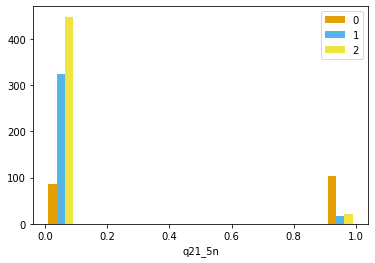

In [156]:
# q21_5n
# Частота каких-то действий

# Заметно явное отличие кластера 0 от кластеров 1 и 2 

x0 = list(res_df[res_df['group_kmeans_norm'] == 0]['q21_5n'])
x1 = list(res_df[res_df['group_kmeans_norm'] == 1]['q21_5n'])
x2 = list(res_df[res_df['group_kmeans_norm'] == 2]['q21_5n'])

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = [0, 1, 2]

plt.hist([x0, x1, x2],
         color = colors, 
         label=names)

plt.legend()
plt.xlabel('q21_5n')

### Выводы

Верхнеуровневое изучение нескольких наиболее важных атрибутов показало, что кластеры отличаются по параметрам между собой

Кластер 0 заметно отличен от кластеров 1 и 2 по частоте совершения каких-то действий (без описания опроса не понять), кластеру 0 соответствуют более высокие частоты совершения этих действий.

Кластеры 1 и 2 в целом схожи но кластер 1 не покупает или покупает редко онлайн, кластер 2 - покупает часто

In [162]:
# Прогрузим датафрейм и вытащим respid
resp_df = pd.read_csv(r'C:\Users\artyo\OneDrive\Рабочий стол\Datasets\Datasets\Nornikel\task.csv')
resp_df = resp_df['respid']

In [164]:
# Сформируем соответствие идентификатора респондента и кластера 
result = pd.merge(resp_df, res_df['group_kmeans_norm'], left_index=True, right_index=True)

In [165]:
result.sample(10)

,respid,group_kmeans_norm
607,1022,2
546,3927,2
801,4881,2
469,4911,1
617,4159,1
35,729,0
919,234,1
955,3855,2
402,3107,0
702,4267,2
